In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [2]:
files = glob.glob('*dat')
files = [i.replace(".dat", "") for i in files]
files

['FISH.2705.4664.CM.nm', 'FISH.2705.3268.CM.nm']

In [3]:
data = pd.DataFrame()
for sample in files:
    df = pd.read_csv(f"{sample}.dat", sep="\t")
    df.columns = ["dist"]
    df["sample"] = "_".join(sample.split(".")[0:3])
    data = pd.concat([data, df])
data["dist"] = data["dist"]/1000
data

,dist,sample
0,2.781020,FISH_2705_4664
1,1.221320,FISH_2705_4664
2,1.908620,FISH_2705_4664
3,1.492730,FISH_2705_4664
4,1.313800,FISH_2705_4664
...,...,...
743,0.849223,FISH_2705_3268
744,0.873272,FISH_2705_3268
745,0.773341,FISH_2705_3268
746,0.671683,FISH_2705_3268


In [4]:
data = data.replace({"FISH_2705_4664": "5.8 Mb", "FISH_2705_3268": "1.7 Mb"})

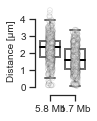

In [5]:
cm = 1/2.54
sns.set(style="ticks", font="Arial")
sns.set_context("notebook", rc={"font.size":1,
                                "axes.labelsize": 10,
                                "xtick.labelsize": 10,
                                "ytick.labelsize": 10})   
props = {
    'boxprops':{'edgecolor':'dimgrey'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'dimgrey'},
    'capprops':{'color':'dimgrey'}
}
g = sns.catplot(data=data, kind='box', 
                x='sample', y='dist',
                dodge=False, showfliers=False, height=5*cm, aspect=0.75,
                linewidth=2, hue="sample", legend=False, **props,
                palette=["white", "white"])
g.map_dataframe(sns.stripplot, x='sample', y='dist', hue='sample', 
                size=5, edgecolor="k", linewidth=0.5,
                palette=['whitesmoke', 'whitesmoke'], alpha=0.15)
for ax in g.axes.flat:
    ax.set_ylabel("Distance [µm]", size=10)
    ax.set_xlabel("")
    ax.set_yticks([0, 1, 2, 3, 4])
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin - 0.1, xmax + 0.1)
ax.set_ylim(-0.5, 4.75)
sns.despine(trim=True)
plt.savefig("sim_distances.svg", bbox_inches="tight")

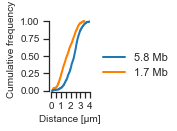

In [6]:
g = sns.displot(
    data,
    x="dist", hue="sample",
    kind="ecdf", aspect=0.75, linewidth=2, height=5*cm,
    palette=["#1f78b4", "#ff7f00"]
)
g.legend.set_title(None)
g.set(xticks=np.linspace(0, 4, 9),
      xticklabels=[0, "", 1, "", 2, "", 3, "", 4],
      xlim=[-0.25, 4],
      yticks=[0, 0.25, 0.5, 0.75, 1],
      ylim=[-0.02, 1.2])
sns.despine(trim=True)
for ax in g.axes.flat:
    ax.set_xlabel("Distance [µm]", size=10)
    ax.set_ylabel("Cumulative frequency", size=10)
#         ax.set_xlabel("")
#     if len(ax.get_ylabel()) == 0:
#         ax.spines['left'].set_visible(False)
#         ax.tick_params(axis='y', left=False)
#     else:
#         ax.set_ylabel("Cumulative frequency", size=10)
plt.savefig("sim_distances_ecdf.svg", bbox_inches="tight")